### Spending Analysis using Al Rajhi Bank SMS  
The following notebook designed  to extract and analyze spending details using Al Rajhi bank SMS messages.

First of all we need to export our sms messages to csv file I used the following app : 
[# SMS, Call - XML, PDF, CSV(Super Backup & Restore)](https://play.google.com/store/apps/details?id=com.greenchills.superbackup)


Sample file : [Messages.csv](https://drive.google.com/file/d/1RGOv5ArpOqn0TxdgnYmls9Z0v_UuXlGw/view?usp=sharing)

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None

In [0]:
df = pd.read_csv('messages.csv')
df.head()

,phoneNumber,messageTime,messageType,message
0,alhokair AD,6/14/2018 19:18,Received,سباركيز خيارك الاول في عالم الترفيه وعيدكم مبارك
1,AlhokairAD,6/15/2018 7:03,Received,نتشرف بزيارتكم مجدداً في سباركيز b\nit.ly/2l8mNdZ
2,AsalBarriAD,6/15/2018 21:42,Received,عيدكم مبارك.\n\nفروع العسل البري المداومة في ا...
3,AlRajhiBank,7/9/2018 13:09,Received,دفع عبر نقاط البيع مدى اثير 47.00SAR بطاقة مدى...
4,AlRajhiBank,7/9/2018 19:35,Received,دفع عبر نقاط البيع 53.00SAR بطاقة مدى رقم ****...


In [0]:
rajhi =df[df["phoneNumber"]=="AlRajhiBank"]

In [0]:
rajhi.shape

(8, 4)

In [0]:
daf3 = rajhi[rajhi["message"].str.contains("دفع") ]
daf3 = daf3.drop(columns="messageType")


**Message parsing :** 

     دفع عبر نقاط البيع 53.00SAR
    بطاقة مدى رقم ****100 DIPLOMAT SWEETS 2018/07/09 19:36

 - As you could see we could get the **merchant name** by getting all
   alphabet text after the Card ending number "100"
 - Also we could get the **Amount** by getting the numerical chars after
   SAR



In [0]:
daf3["merchant"] = daf3["message"].str.extract("[\*]+.100.([a-zA-Z|\s|\.|-]+)",expand=True).astype(str)
daf3['amount'] = rajhi.message.str.extract("(\d*.[\d]+).SAR",expand=True)

In [0]:
daf3["amount"] = pd.to_numeric(daf3["amount"])
daf3['messageTime'] = daf3['messageTime'].astype('datetime64[ns]')

In [0]:
daf3["month"] = daf3.messageTime.map(lambda x: x.month).rename("month")
daf3["year"] = daf3.messageTime.map(lambda x: x.year).rename("year")

In [0]:
daf3.tail()

,phoneNumber,messageTime,message,merchant,amount,month,year
3,AlRajhiBank,2018-07-09 13:09:00,دفع عبر نقاط البيع مدى اثير 47.00SAR بطاقة مدى...,KUDU R,47.0,7,2018
4,AlRajhiBank,2018-07-09 19:35:00,دفع عبر نقاط البيع 53.00SAR بطاقة مدى رقم ****...,DIPLOMAT SWEETS,53.0,7,2018
5,AlRajhiBank,2018-07-09 21:22:00,دفع عبر نقاط البيع 120.00SAR بطاقة مدى رقم ***...,SANABEL ALSALAM,120.0,7,2018


In [0]:
Shera  = rajhi[rajhi["message"].str.contains("شراء عبر نقاط البيع") ]
Shera = Shera.drop(columns="messageType")

In [0]:
Shera.head()

,phoneNumber,messageTime,message
7,AlRajhiBank,8/12/2019 20:39,شراء عبر نقاط البيع\nبطاقة:***6100;مدى(أثير) \...
9,AlRajhiBank,8/13/2019 14:43,شراء عبر نقاط البيع\nبطاقة:***6100;مدى \nمن:**...
10,AlRajhiBank,8/13/2019 14:46,شراء عبر نقاط البيع\nبطاقة:***6100;مدى(أثير) \...


**Message parsing :** 


    شراء عبر نقاط البيع
    بطاقة:***6100;مدى(أثير) 
    من:***8815 
    لدى:ALROMANSIA COMPANY LTD 
    مبلغ:SAR 151.00 
    في:2019-08-11 17:01:23

 
 - As you could see we could get the **merchant name** by getting all
   alphabet text after "لدى:" to the end of line 
 - Also we could get the **Amount** by getting the numerical chars after
   "مبلغ:" to the end of line 

In [0]:
Shera["merchant"] = Shera["message"].str.extract("لدى:(.*).\n",expand=True).astype(str)
Shera['amount'] = rajhi.message.str.extract("SAR.(\d*.[\d]+).\n",expand=True)

In [0]:
Shera["amount"] = pd.to_numeric(Shera["amount"])
Shera['messageTime'] = Shera['messageTime'].astype('datetime64[ns]')
Shera["month"] = Shera.messageTime.map(lambda x: x.month).rename("month")
Shera["year"] = Shera.messageTime.map(lambda x: x.year).rename("year")
Shera.head()

,phoneNumber,messageTime,message,merchant,amount,month,year
7,AlRajhiBank,2019-08-12 20:39:00,شراء عبر نقاط البيع\nبطاقة:***6100;مدى(أثير) \...,PAPPAROTI,28.00,8,2019
9,AlRajhiBank,2019-08-13 14:43:00,شراء عبر نقاط البيع\nبطاقة:***6100;مدى \nمن:**...,SAUDI HYPERMARKET CO.,329.82,8,2019
10,AlRajhiBank,2019-08-13 14:46:00,شراء عبر نقاط البيع\nبطاقة:***6100;مدى(أثير) \...,KFC CAREFEOUR,15.00,8,2019


In [0]:
frames = [daf3, Shera]
result = pd.concat(frames,sort=False)
result.head()

,phoneNumber,messageTime,message,merchant,amount,month,year
3,AlRajhiBank,2018-07-09 13:09:00,دفع عبر نقاط البيع مدى اثير 47.00SAR بطاقة مدى...,KUDU R,47.00,7,2018
4,AlRajhiBank,2018-07-09 19:35:00,دفع عبر نقاط البيع 53.00SAR بطاقة مدى رقم ****...,DIPLOMAT SWEETS,53.00,7,2018
5,AlRajhiBank,2018-07-09 21:22:00,دفع عبر نقاط البيع 120.00SAR بطاقة مدى رقم ***...,SANABEL ALSALAM,120.00,7,2018
7,AlRajhiBank,2019-08-12 20:39:00,شراء عبر نقاط البيع\nبطاقة:***6100;مدى(أثير) \...,PAPPAROTI,28.00,8,2019
9,AlRajhiBank,2019-08-13 14:43:00,شراء عبر نقاط البيع\nبطاقة:***6100;مدى \nمن:**...,SAUDI HYPERMARKET CO.,329.82,8,2019


In [0]:
result.merchant =  result.merchant.apply(lambda x: x.rstrip())

# Analysis 

Now you could analyse your data easily 

In [0]:
tabl = pd.pivot_table(result,'amount',[result["year"],result["month"]],aggfunc=np.sum)
tabl

,,amount
year,month,
2018,7,220.00
2019,8,372.82


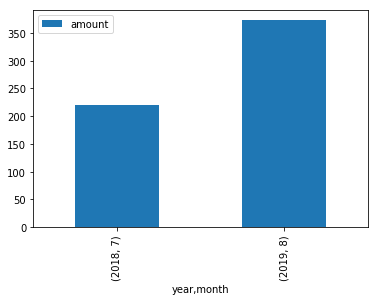

In [0]:
tabl.plot(kind='bar')

In [0]:
result.amount.describe()

count      6.000000
mean      98.803333
std      118.857596
min       15.000000
25%       32.750000
50%       50.000000
75%      103.250000
max      329.820000
Name: amount, dtype: float64

In [0]:
pd.pivot_table(data=result,values='amount', index='merchant', columns=["year","month"], aggfunc='sum').head()

year,2018,2019
month,7,8
merchant,,
DIPLOMAT SWEETS,53.0,NaN
KFC CAREFEOUR,NaN,15.0
KUDU R,47.0,NaN
PAPPAROTI,NaN,28.0
SANABEL ALSALAM,120.0,NaN


In [0]:
pd.pivot_table(result,'amount',[result['merchant'],result["year"]],aggfunc=np.sum).sort_values(by='amount', ascending=False)

,,amount
merchant,year,
SAUDI HYPERMARKET CO.,2019,329.82
SANABEL ALSALAM,2018,120.00
DIPLOMAT SWEETS,2018,53.00
KUDU R,2018,47.00
PAPPAROTI,2019,28.00
KFC CAREFEOUR,2019,15.00
